In [27]:
import random
import seaborn
import numpy as np
import pandas as pd
from lxml import etree
import matplotlib as plt
from IPython.display import display

In [75]:
posts_file = "Posts.csv"
comments_file = "Comments.csv"
tags_file = "Tags.csv"
links_file = "PostLinks.csv"

# Posts

In [21]:
posts_df = pd.read_csv(posts_file,  encoding = "ISO-8859-1")

C:\Tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
display(posts_df.info())
display(posts_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740551 entries, 0 to 740550
Data columns (total 21 columns):
AcceptedAnswerId         155413 non-null float64
AnswerCount              289122 non-null float64
Body                     740551 non-null object
ClosedDate               12766 non-null object
CommentCount             740551 non-null int64
CommunityOwnedDate       2575 non-null object
CreationDate             740551 non-null object
FavoriteCount            64482 non-null float64
Id                       740551 non-null int64
LastActivityDate         740551 non-null object
LastEditDate             290661 non-null object
LastEditorDisplayName    4643 non-null object
LastEditorUserId         288674 non-null float64
OwnerDisplayName         16003 non-null object
OwnerUserId              734193 non-null float64
ParentId                 451429 non-null float64
PostTypeId               740551 non-null int64
Score                    740551 non-null int64
Tags                     28912

None

,AcceptedAnswerId,AnswerCount,CommentCount,FavoriteCount,Id,LastEditorUserId,OwnerUserId,ParentId,PostTypeId,Score,ViewCount
count,1.554130e+05,289122.000000,740551.000000,64482.000000,7.405510e+05,2.886740e+05,7.341930e+05,4.514290e+05,740551.000000,740551.000000,2.891220e+05
mean,2.188093e+07,1.568888,1.616648,2.588831,2.270647e+07,1.670357e+06,2.047029e+06,2.046728e+07,1.609585,2.313132,1.909157e+03
std,1.302721e+07,1.467868,2.446708,15.939425,1.329865e+07,1.863811e+06,2.000867e+06,1.330404e+07,0.487844,20.588704,1.284067e+04
min,1.520000e+02,0.000000,0.000000,0.000000,1.460000e+02,-1.000000e+00,1.000000e+00,1.460000e+02,1.000000,-154.000000,2.000000e+00
25%,1.046178e+07,1.000000,0.000000,1.000000,1.108498e+07,2.019520e+05,4.500710e+05,8.633090e+06,1.000000,0.000000,7.100000e+01
50%,2.122981e+07,1.000000,1.000000,1.000000,2.251738e+07,9.902140e+05,1.342021e+06,1.931117e+07,2.000000,1.000000,2.340000e+02
75%,3.295962e+07,2.000000,2.000000,2.000000,3.430112e+07,2.557554e+06,3.134247e+06,3.172841e+07,2.000000,2.000000,8.820000e+02
max,4.589754e+07,129.000000,78.000000,1975.000000,4.589752e+07,8.519147e+06,8.520969e+06,4.565597e+07,2.000000,8452.000000,1.879439e+06


In [23]:
posts_df.head()

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,NaN,0.0,<p>I have data to export in an xml file.For t...,NaN,8,NaN,2014-05-20T08:55:37.760,0.0,23755195,2014-05-20T10:35:35.720,...,NaN,2265011.0,NaN,2933719.0,NaN,1,0,<php><xml><zend-framework>,export xml file with php,60.0
1,11641969.0,2.0,"<p>Specifically, I just want to generate a cry...",NaN,0,NaN,2012-02-25T05:36:55.577,NaN,9441598,2016-10-05T15:19:19.207,...,NaN,839689.0,NaN,234261.0,NaN,1,3,<java><android><security><openssl>,Is there a java equivalent to OpenSSL's bn_ran...,782.0
2,27978026.0,1.0,<p>I have developed an ASP.NET MVC 5 website t...,NaN,0,NaN,2015-01-16T05:48:50.200,0.0,27978003,2015-01-16T05:51:26.993,...,NaN,NaN,NaN,694903.0,NaN,1,1,<asp.net-mvc><seo>,Google is indexing post actions,151.0
3,1989786.0,1.0,<p>I'm writing an client application that has ...,NaN,0,NaN,2010-01-01T06:14:51.083,NaN,1988012,2010-01-01T21:58:37.020,...,NaN,NaN,NaN,157552.0,NaN,1,1,<.net><ssl><httpwebrequest>,"HTTPWebRequest, SSL end point validation and",586.0
4,NaN,1.0,<p>I have a wcf service hosted in sharepoint t...,NaN,0,NaN,2012-09-11T13:10:03.250,NaN,12370490,2012-09-11T16:45:50.587,...,NaN,NaN,NaN,634046.0,NaN,1,0,<wcf><sharepoint><datajs>,Can datajs read non-odata services,81.0


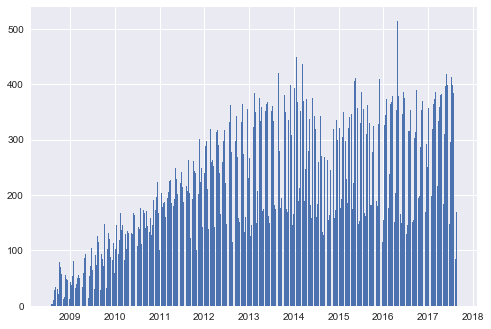

In [57]:
import matplotlib.pyplot as plt
posts_df['CreationDate'] = pd.to_datetime(posts_df['CreationDate']).dt.date
counts = posts_df['CreationDate'].value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

# Comments

In [63]:
comments_df = pd.read_csv(comments_file,  encoding = "ISO-8859-1")

In [64]:
display(comments_df.info())
display(comments_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617492 entries, 0 to 617491
Data columns (total 7 columns):
CreationDate       617491 non-null object
Id                 617492 non-null int64
PostId             617491 non-null float64
Score              617491 non-null float64
Text               617491 non-null object
UserDisplayName    4725 non-null object
UserId             552667 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 33.0+ MB


None

,Id,PostId,Score,UserId
count,6.174920e+05,6.174910e+05,617491.000000,5.526670e+05
mean,4.281410e+07,2.646255e+07,0.283662,2.052768e+06
std,2.099738e+07,1.176410e+07,1.201878,1.916689e+06
min,6.070000e+02,4.689000e+03,0.000000,1.000000e+00
25%,2.571467e+07,1.723063e+07,0.000000,5.246150e+05
50%,4.683328e+07,2.896702e+07,0.000000,1.416237e+06
75%,5.912534e+07,3.548742e+07,0.000000,3.105538e+06
max,7.864530e+07,4.584342e+07,250.000000,8.506751e+06


In [65]:
comments_df.head()

,CreationDate,Id,PostId,Score,Text,UserDisplayName,UserId
0,2008-09-08T23:33:45.430,607,50794.0,0.0,"Can you give an example of what you mean by ""r...",NaN,3408.0
1,2008-09-09T11:54:40.610,824,51684.0,0.0,Is this a question about how to use the samuri...,NaN,4200.0
2,2008-09-09T14:14:33.550,896,51964.0,0.0,The reason the the querystring is read-only is...,NaN,2257.0
3,2008-09-09T16:08:45.507,992,51885.0,0.0,Wow... it is amazing most everyone does the sa...,NaN,2535.0
4,2008-09-10T17:53:15.343,1710,54797.0,0.0,"well if you answer your question, should it be...",NaN,4685.0


# Tags

In [71]:
tags_df = pd.read_csv(tags_file,  encoding = "ISO-8859-1" )

In [72]:
display(tags_df.info())
display(tags_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 5 columns):
Count            50000 non-null float64
ExcerptPostId    36088 non-null float64
Id               50000 non-null float64
TagName          49999 non-null object
WikiPostId       36088 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


None

,Count,ExcerptPostId,Id,WikiPostId
count,5.000000e+04,3.608800e+04,50000.000000,3.608800e+04
mean,8.584276e+02,2.013356e+07,70953.986260,2.013349e+07
std,1.550350e+04,1.140341e+07,40705.477352,1.140351e+07
min,1.000000e+00,3.624936e+06,1.000000,3.606997e+06
25%,1.000000e+01,1.027232e+07,32426.750000,1.027232e+07
50%,3.600000e+01,1.788308e+07,76955.500000,1.788307e+07
75%,1.530000e+02,2.894264e+07,108904.250000,2.894263e+07
max,1.457944e+06,4.590104e+07,128242.000000,4.590104e+07


In [73]:
tags_df.head()

,Count,ExcerptPostId,Id,TagName,WikiPostId
0,257092.0,3624959.0,1.0,.net,3607476.0
1,683981.0,3673183.0,2.0,html,3673182.0
2,1457944.0,3624960.0,3.0,javascript,3607052.0
3,490198.0,3644670.0,4.0,css,3644669.0
4,1114030.0,3624936.0,5.0,php,3607050.0


# PostLinks

In [81]:
links_df = pd.read_csv(links_file,  encoding = "ISO-8859-1" )

In [82]:
display(links_df.info())
display(links_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406858 entries, 0 to 4406857
Data columns (total 5 columns):
CreationDate     object
Id               float64
LinkTypeId       float64
PostId           float64
RelatedPostId    float64
dtypes: float64(4), object(1)
memory usage: 168.1+ MB


None

,Id,LinkTypeId,PostId,RelatedPostId
count,4.406857e+06,4.406857e+06,4.406857e+06,4.406857e+06
mean,9.555026e+08,1.233750e+00,2.579506e+07,1.225025e+07
std,3.257638e+08,6.425424e-01,1.279236e+07,1.141506e+07
min,1.900000e+01,1.000000e+00,9.000000e+00,0.000000e+00
25%,8.021379e+08,1.000000e+00,1.509226e+07,2.819781e+06
50%,1.007205e+09,1.000000e+00,2.703287e+07,8.586722e+06
75%,1.210140e+09,1.000000e+00,3.692188e+07,1.904878e+07
max,1.353757e+09,3.000000e+00,4.590234e+07,3.825315e+08


In [83]:
links_df.head()

,CreationDate,Id,LinkTypeId,PostId,RelatedPostId
0,2010-04-26T02:59:48.130,19.0,1.0,109.0,32412.0
1,2010-04-26T02:59:48.600,37.0,1.0,1970.0,617600.0
2,2010-04-26T02:59:48.647,42.0,1.0,2154.0,2451138.0
3,2010-04-26T02:59:48.740,48.0,1.0,2483.0,496096.0
4,2010-04-26T02:59:48.757,52.0,1.0,2572.0,209329.0


# Cross Checks

## Comments.PostId - PostId relation

In [94]:
questions_df = posts_df[posts_df['PostTypeId'] == 1]
relation_array = ~np.isin(comments_df['PostId'].unique(), questions_df['Id'].unique())

In [108]:
assert len(list(filter(lambda x: x is True, relation_array))) == 0, "Not equal"

## ParentId - Id relation

In [100]:
questions_df = posts_df[posts_df['PostTypeId'] == 1]
answers_df = posts_df[posts_df['PostTypeId'] == 2]

In [101]:
relation_array = ~np.isin(answers_df['ParentId'].unique(), questions_df['Id'].unique())

In [111]:
assert len(list(filter(lambda x: x is True, relation_array))) == 0, "Not equal"

## AcceptedAnswerId - Id

In [ ]:
questions_df = posts_df[posts_df['PostTypeId'] == 1]
answers_df = posts_df[posts_df['PostTypeId'] == 2]

In [103]:
relation_array = ~np.isin(questions_df['AcceptedAnswerId'].unique(), answers_df['Id'].unique())

In [105]:
assert len(list(filter(lambda x: x is True, relation_array))) == 0, "Not equal"